# Lights model tutorial

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tick.plot import plot_point_process
from lights.simulation import SimuJointLongitudinalSurvival
from sklearn.model_selection import ShuffleSplit
from lifelines.utils import concordance_index as c_index_score

## Generate data

In [8]:
n_long_features = 2
simu = SimuJointLongitudinalSurvival(n_long_features=n_long_features, seed=123,
                                     n_time_indep_features=3)
X, Y, T, delta = simu.simulate()

print("\nLevel of censoring: %.2f%%" % (100*(1 - delta.mean())))

-----------------------------------------------------------
Launching simulation using SimuJointLongitudinalSurvival...
--------------------------------------------------
Launching simulation using SimuHawkesExpKernels...
Done simulating using SimuHawkesExpKernels in 1.49e-03 seconds.
Done simulating using SimuJointLongitudinalSurvival in 8.97e-03 seconds.

Level of censoring: 35.50%


### Visualize Hawkes Processes used to generate time measurements of longitudinal data

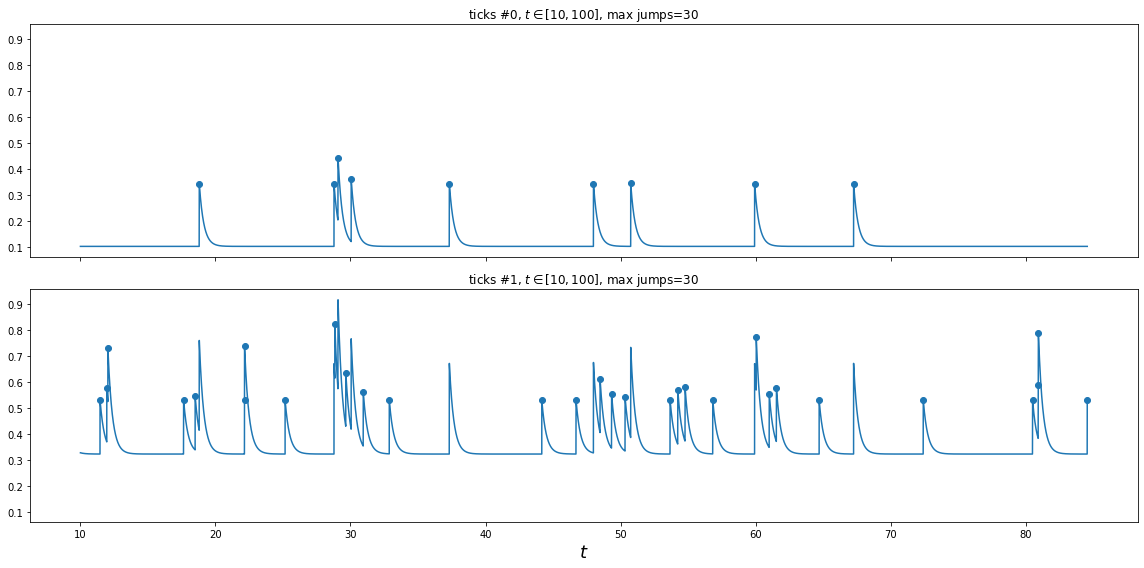

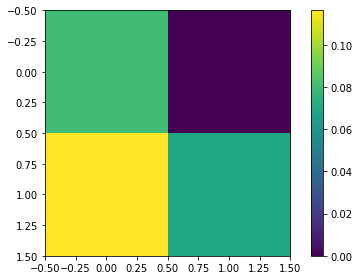

In [9]:
hawkes = simu.hawkes
adjacency = hawkes.adjacency

fig, ax = plt.subplots(n_long_features, 1, figsize=(16, 8), sharex=True, sharey=True)
plot_point_process(hawkes, n_points=50000, t_min=10, max_jumps=30, ax=ax)
fig.tight_layout()

plt.figure()
plt.imshow(adjacency)
plt.colorbar()
plt.tight_layout()

### Visualise generated times

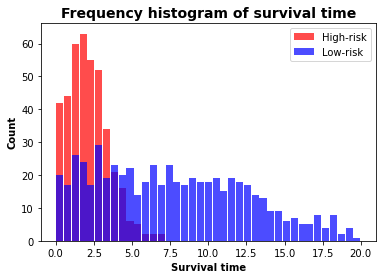

In [10]:
G = simu.latent_class
df = pd.DataFrame(data={"time": T, "group": G})
bins = np.linspace(0, 20, 40)
kwargs = dict(bins=bins, alpha=0.7, rwidth=0.9)
plt.hist(df.loc[df.group == 1, 'time'], **kwargs, color='r', label='High-risk')
plt.hist(df.loc[df.group==0, 'time'], **kwargs, color='b', label='Low-risk')
plt.legend()
plt.xlabel("Survival time",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.title("Frequency histogram of survival time",fontweight="bold",size=14)
plt.show()

## Data splitting

In [ ]:
## Assign index for each feature ##
features_names = range(X.shape[1]) 
n_samples, n_features = X.shape

## Split data into training and test sets ##
test_size = .3  # proportion of data used for testing
rs = ShuffleSplit(n_splits=1, test_size=test_size, random_state=0)

for train_index, test_index in rs.split(X):
    X_test = X[test_index]
    delta_test = delta[test_index]
    Y_test = Y[test_index]

    X = X[train_index]
    Y = Y[train_index]
    delta = delta[train_index]  
    
print("%d%% for training, %d%% for testing." 
      % ((1 - test_size) * 100, test_size * 100))

## Training 

In [ ]:
## Choose parameters ##
tol = 1e-6            # tolerance for the convergence stopping criterion 
eta = 0.3             # parameter controlling the trade-off between l1 
                      # and l2 regularization in the elasticNet
gamma_chosen = '1se'  # way to select l_elasticNet_chosen: '1se' or 'min'
warm_start = True     # at each L-BGFS-B iteration, reset beta to 0 or take 
                      # the previous value 
grid_size = 30        # grid size for the cross validation procedure
metric = 'C-index'    # cross-validation metric: 'log_lik' or 'C-index'

# declare learner here        

## Cross-validation ##

## Run selected model with l_elasticNet_chosen ##

# run final fit here

## Prediction

In [ ]:
## Obtain the marker vector on test set ##

# prediction here

#c_index = c_index_score(Y_test, marker, delta_test)
#c_index = max(c_index, 1 - c_index)

print("Done predicting on test set.")
#print("C-index : %.2f" % c_index)

## Figures

### Learning curves

### Convergence

### Beta coefficients